# RNA-SeQC metrics report

In [1]:
import pandas as pd
import qtl.io
import rnaseqc.report
import numpy as np

ModuleNotFoundError: No module named 'rnaseqc'

In [2]:
# load inputs
metrics_df = pd.read_csv('~/Documents/2023/CDK4_all_RNA_updated/CDK4_aggregated_090123_v2.metrics.txt', sep='\t', index_col=0)
tpm_df = qtl.io.read_gct('~/Documents/2023/CDK4_all_RNA_updated/CDK4_aggregated_090123_v2.gene_tpm.gct')
counts_df = qtl.io.read_gct('~/Documents/2023/CDK4_all_RNA_updated/CDK4_aggregated_090123_v2.gene_reads.gct')
cohort_s = pd.read_csv('~/Documents/2023/CDK4_all_RNA_updated/CDK4_aggregated_090123_v2.metrics.txt', sep='\t', index_col=0, header=None, squeeze=True)
insertsize_df = pd.read_csv('~/Documents/2023/CDK4_all_RNA_updated/CDK4_aggregated_090123_v2.insert_size_hists.txt', sep='\t', index_col=0)

/var/folders/sr/b1h9whmj7nz200c0lnkg37sh0000gq/T/ipykernel_98310/840920190.py:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  cohort_s = pd.read_csv('~/Documents/2023/CDK4_all_RNA_updated/CDK4_aggregated_090123_v2.metrics.txt', sep='\t', index_col=0, header=None, squeeze=True)


In [10]:
tpm_df

,Description,RP-1700_T001137-10_v3_RNA_OnPrem,RP-1700_T001137-1_v3_RNA_OnPrem,RP-1700_T001137-2_v2_RNA_OnPrem,RP-1700_T001137-3_v2_RNA_OnPrem,RP-1700_T001137-4_v3_RNA_OnPrem,RP-1700_T001137-5_v3_RNA_OnPrem,RP-1700_T001137-6_v3_RNA_OnPrem,RP-1700_T001137-7_v2_RNA_OnPrem,RP-1700_T001137-8_v2_RNA_OnPrem,...,RP-1700_T03142-1_v1_RNA_OnPrem,RP-1700_T03142-2_v1_RNA_OnPrem,RP-1700_T03142-3_v1_RNA_OnPrem,RP-1700_T03142-4_v1_RNA_OnPrem,RP-1700_T03142-6_v1_RNA_OnPrem,RP-1700_T03142-7_v1_RNA_OnPrem,RP-1700_T03142-8_v1_RNA_OnPrem,RP-1700_T03142-9_v1_RNA_OnPrem,RP-1943_T01097-18_v1_RNA_OnPrem,RP-1943_T01375-15_v1_RNA_OnPrem
Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.4,DDX11L1,0.104384,0.120324,0.241415,0.457740,0.152961,0.057254,0.512238,0.159928,0.253963,...,0.171866,0.207293,0.266347,0.183295,0.036389,0.214763,0.388420,0.440167,0.000000,0.103169
ENSG00000227232.4,WASH7P,14.870200,10.741000,20.709000,24.000700,12.752700,33.606700,14.021500,7.090690,16.400300,...,14.798200,19.430300,28.238800,13.073400,7.663420,5.890020,5.990010,9.969910,26.751400,43.142300
ENSG00000243485.2,MIR1302-11,0.092750,0.143922,0.402200,0.203361,0.339780,0.254361,0.000000,0.710514,0.000000,...,0.330872,0.230236,0.059165,0.135721,0.080832,0.043369,0.000000,0.000000,0.000000,0.000000
ENSG00000237613.2,FAM138A,0.000000,0.064767,0.084465,0.128122,0.000000,0.000000,0.573504,0.000000,0.355423,...,0.128282,0.145054,0.223653,0.342030,0.000000,0.081972,0.060400,0.000000,0.016438,0.000000
ENSG00000268020.2,OR4G4P,0.075219,0.050022,0.108726,0.329844,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.123845,0.093359,0.000000,0.000000,0.000000,0.000000,0.077748,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695.2,MT-ND6,1137.340000,964.590000,2578.400000,4470.640000,3802.670000,2998.150000,4429.970000,5419.330000,5088.550000,...,2849.640000,4150.070000,4765.450000,6292.340000,4070.550000,3169.880000,6951.810000,6777.630000,243.167000,217.339000
ENSG00000210194.1,MT-TE,1.548520,0.457689,0.746111,13.581000,0.000000,2.831150,5.065960,0.000000,0.000000,...,1.133150,0.000000,1.317070,1.510630,0.000000,0.000000,0.000000,0.000000,0.000000,0.364404
ENSG00000198727.2,MT-CYB,16760.200000,13916.800000,45173.100000,52264.800000,26319.400000,39421.400000,52010.500000,53007.500000,53944.600000,...,49959.900000,40063.000000,48526.400000,33171.400000,43951.200000,35847.700000,65012.500000,57754.900000,1563.490000,2273.310000


In [11]:
tpm_df.columns.to_list()

['Description',
 'RP-1700_T001137-10_v3_RNA_OnPrem',
 'RP-1700_T001137-1_v3_RNA_OnPrem',
 'RP-1700_T001137-2_v2_RNA_OnPrem',
 'RP-1700_T001137-3_v2_RNA_OnPrem',
 'RP-1700_T001137-4_v3_RNA_OnPrem',
 'RP-1700_T001137-5_v3_RNA_OnPrem',
 'RP-1700_T001137-6_v3_RNA_OnPrem',
 'RP-1700_T001137-7_v2_RNA_OnPrem',
 'RP-1700_T001137-8_v2_RNA_OnPrem',
 'RP-1700_T001137-9_v2_RNA_OnPrem',
 'RP-1700_T00655-11_v2_RNA_OnPrem',
 'RP-1700_T00655-13_v2_RNA_OnPrem',
 'RP-1700_T00655-15_v2_RNA_OnPrem',
 'RP-1700_T00655-17_v1_RNA_OnPrem',
 'RP-1700_T00655-19_v1_RNA_OnPrem',
 'RP-1700_T00655-21_v1_RNA_OnPrem',
 'RP-1700_T00655-6_v2_RNA_OnPrem',
 'RP-1700_T00655-8_v2_RNA_OnPrem',
 'RP-1700_T00690-10_v2_RNA_OnPrem',
 'RP-1700_T00690-12_v2_RNA_OnPrem',
 'RP-1700_T00690-14_v2_RNA_OnPrem',
 'RP-1700_T00690-16_v2_RNA_OnPrem',
 'RP-1700_T00690-18_v2_RNA_OnPrem',
 'RP-1700_T00690-20_v1_RNA_OnPrem',
 'RP-1700_T00690-2_v1_RNA_OnPrem',
 'RP-1700_T00690-4_v1_RNA_OnPrem',
 'RP-1700_T00690-6_v1_RNA_OnPrem',
 'RP-1700_T00690

In [ ]:
"""
    threshold_dict = {
        'Mapped Reads': 50e6,
        'Mapping Rate': 0.9,
        # 'Duplicate Rate of Mapped': 0.6,
        'Exonic Rate': 0.7,
        'Intronic Rate': 0.05,
        'Intergenic Rate': 0.1,
        'Chimeric Alignment Rate': 0.01,
        'rRNA Rate': 0.1,

"""

/Users/lmartin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/Users/lmartin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/Users/lmartin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/Users/lmartin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y

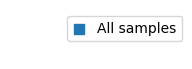

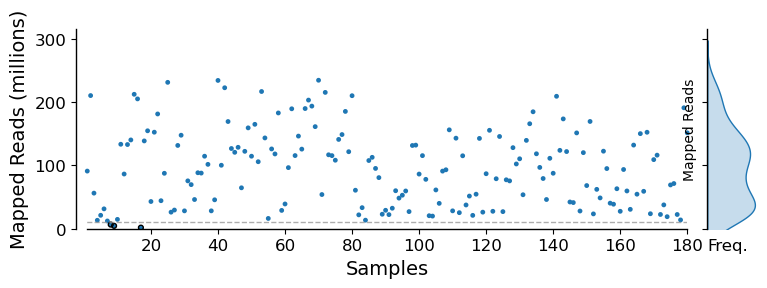

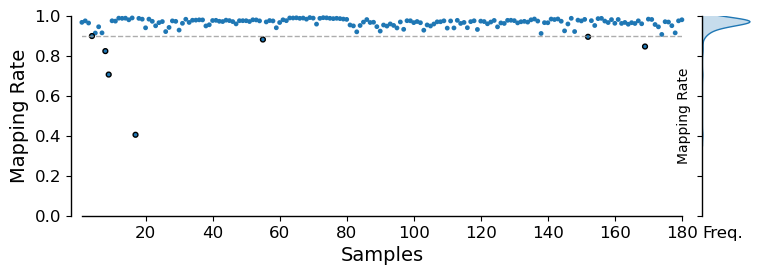

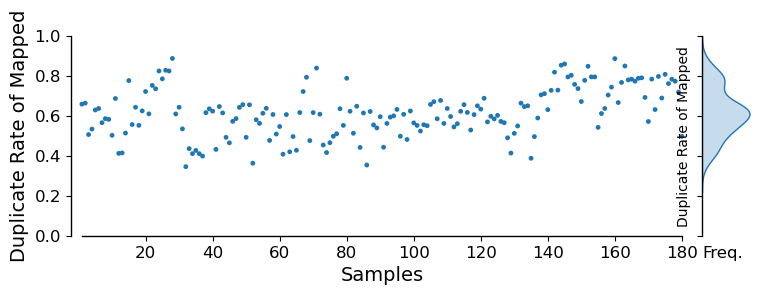

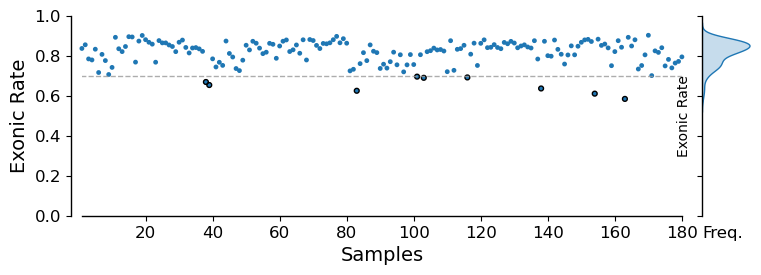

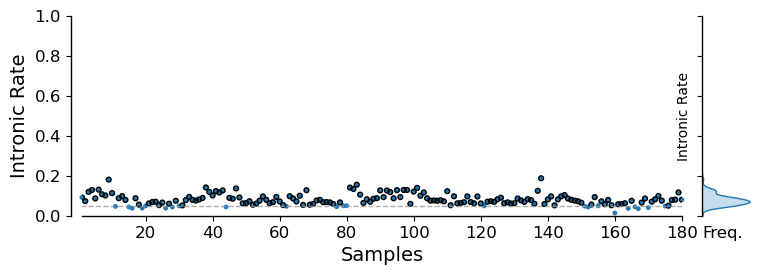

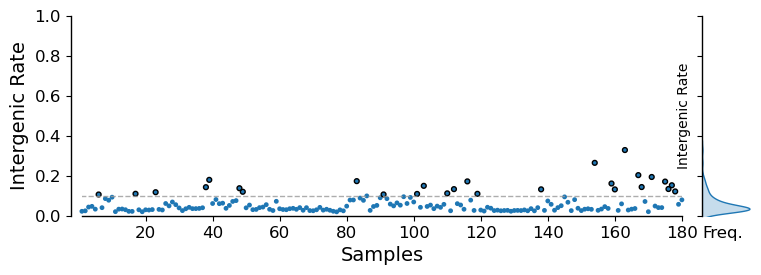

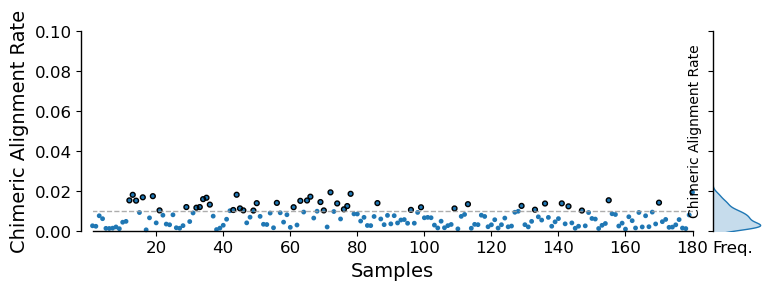

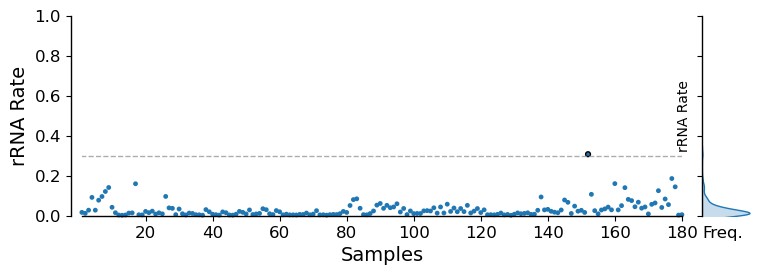

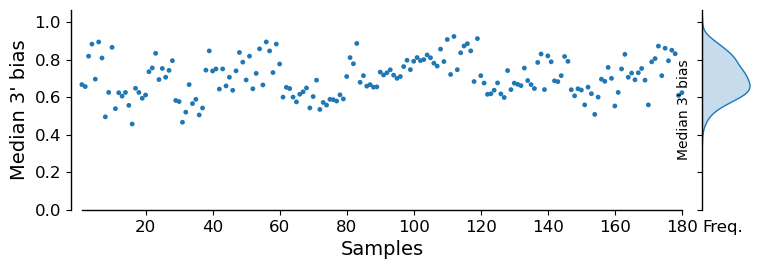

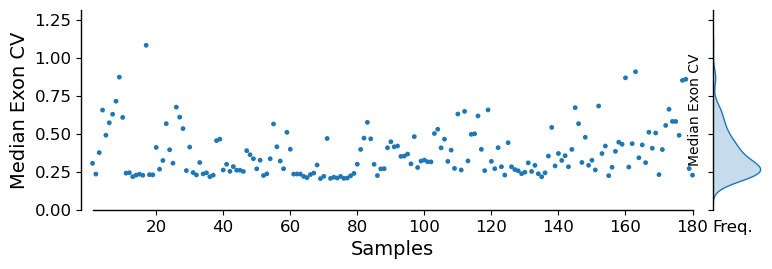

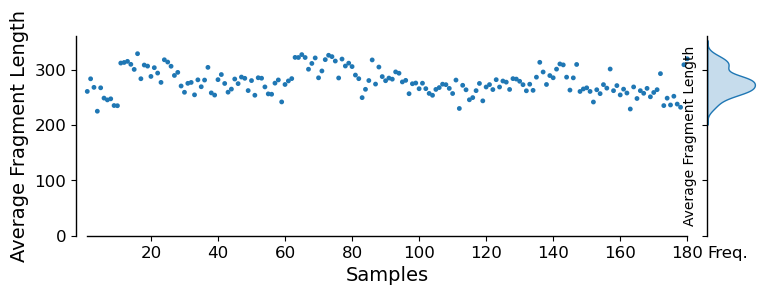

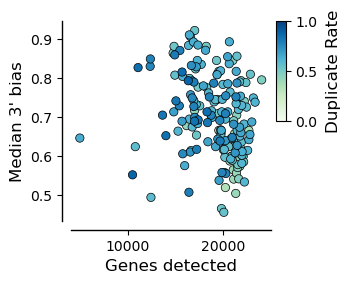

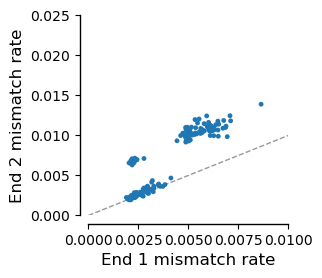

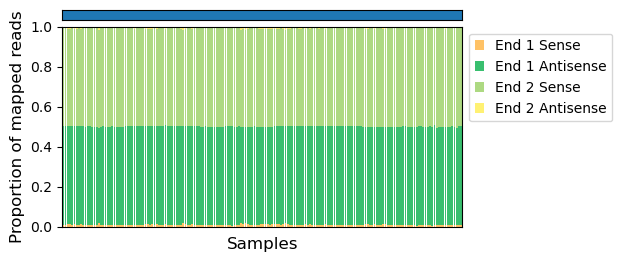

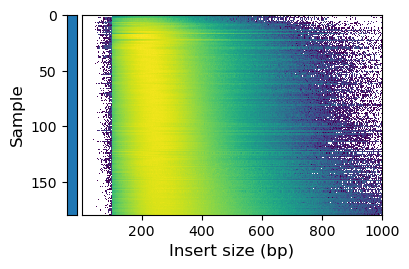

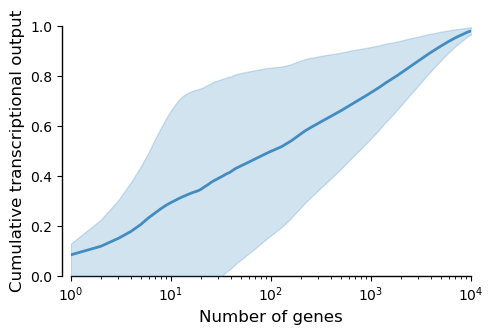

In [12]:
thresholds = {'Exonic Rate': 0.7,'Mapped Reads': 10e6, 'rRNA Rate':0.3}
rnaseqc.report.plot_qc_figures(metrics_df, cohort_s=None, cohort_colors=None, date_s=None,
                               show_legend=True, ms=12, alpha=1, highlight_ids=None,
                               thresholds=thresholds, insertsize_df=insertsize_df, tpm_df=tpm_df)

In [61]:
metrics_df[metrics_df['Intronic Rate'] < 0.05]['Intronic Rate']

sample_id
RP-1700_T00655-11_v2_RNA_OnPrem    0.046507
RP-1700_T00655-19_v1_RNA_OnPrem    0.043878
RP-1700_T00655-21_v1_RNA_OnPrem    0.037277
RP-1700_T00690-10_v2_RNA_OnPrem    0.038376
RP-1700_T00690-12_v2_RNA_OnPrem    0.049228
RP-1700_T00690-4_v1_RNA_OnPrem     0.037575
RP-1700_T00690-8_v1_RNA_OnPrem     0.043566
RP-1700_T01027-13_v2_RNA_OnPrem    0.048625
RP-1700_T01097-24_v2_RNA_OnPrem    0.043799
RP-1700_T01327-9_v3_RNA_OnPrem     0.047010
RP-1700_T01354-6_v2_RNA_OnPrem     0.045204
RP-1700_T01354-8_v2_RNA_OnPrem     0.049503
RP-1700_T01354-9_v2_RNA_OnPrem     0.049859
RP-1700_T01533-9_v2_RNA_OnPrem     0.049329
RP-1700_T03093-16_v1_RNA_OnPrem    0.047974
RP-1700_T03093-17_v1_RNA_OnPrem    0.043418
RP-1700_T03093-20_v1_RNA_OnPrem    0.049549
RP-1700_T03093-7_v1_RNA_OnPrem     0.013684
RP-1700_T03142-11_v1_RNA_OnPrem    0.036215
RP-1700_T03142-13_v1_RNA_OnPrem    0.044394
RP-1700_T03142-14_v1_RNA_OnPrem    0.035196
RP-1700_T03142-18_v1_RNA_OnPrem    0.040567
RP-1700_T03142-6_v1_RN

In [62]:
metrics_df[metrics_df['Mapped Reads'] < 10000000]['Mapped Reads']

sample_id
RP-1700_T001137-7_v2_RNA_OnPrem    6571470.0
RP-1700_T001137-8_v2_RNA_OnPrem    4509830.0
RP-1700_T00655-6_v2_RNA_OnPrem     1695430.0
Name: Mapped Reads, dtype: float64

In [63]:
metrics_df[metrics_df['Mapping Rate'] < 0.9]['Mapping Rate']

sample_id
RP-1700_T001137-3_v2_RNA_OnPrem    0.898442
RP-1700_T001137-7_v2_RNA_OnPrem    0.823145
RP-1700_T001137-8_v2_RNA_OnPrem    0.705833
RP-1700_T00655-6_v2_RNA_OnPrem     0.404763
RP-1700_T01327-17_v2_RNA_OnPrem    0.881064
RP-1700_T03093-17_v1_RNA_OnPrem    0.894548
RP-1700_T03142-17_v1_RNA_OnPrem    0.846059
Name: Mapping Rate, dtype: float64

In [64]:
metrics_df[metrics_df['rRNA Rate'] > 0.1]['rRNA Rate']

sample_id
RP-1700_T001137-7_v2_RNA_OnPrem    0.121096
RP-1700_T001137-8_v2_RNA_OnPrem    0.141132
RP-1700_T00655-6_v2_RNA_OnPrem     0.159882
RP-1700_T03093-17_v1_RNA_OnPrem    0.307548
RP-1700_T03093-18_v1_RNA_OnPrem    0.107019
RP-1700_T03093-7_v1_RNA_OnPrem     0.160524
RP-1700_T03142-10_v1_RNA_OnPrem    0.140319
RP-1700_T03142-3_v1_RNA_OnPrem     0.125076
RP-1700_T03142-8_v1_RNA_OnPrem     0.185983
RP-1700_T03142-9_v1_RNA_OnPrem     0.144499
Name: rRNA Rate, dtype: float64

## remove samples with poor metrics and low tumor purity

In [3]:
samples_to_remove = ['RP-1700_T001137-7_v2_RNA_OnPrem','RP-1700_T001137-8_v2_RNA_OnPrem', 
                                  'RP-1700_T00655-6_v2_RNA_OnPrem', 'RP-1700_T00655-6_v2_RNA_OnPrem',
                     'RP-1943_T01097-18_v1_RNA_OnPrem','RP-1943_T01375-15_v1_RNA_OnPrem']

low_tumor_purity = ['RP-1700_T03142-4_v1_RNA_OnPrem',
                    'RP-1700_T03142-6_v1_RNA_OnPrem',
                    'RP-1700_T03142-14_v1_RNA_OnPrem',
                    'RP-1700_T03142-15_v1_RNA_OnPrem',
                    
                    'RP-1700_T03093-19_v1_RNA_OnPrem',
                    
                    'RP-1700_T00655-21_v1_RNA_OnPrem',
                    'RP-1700_T00655-19_v1_RNA_OnPrem',
                    
                    'RP-1700_T00690-18_v2_RNA_OnPrem',
                    
                    'RP-1700_T01488-8_v2_RNA_OnPrem', 
                    
                   
                   'RP-1700_T01687-12_v3_RNA_OnPrem',
                   'RP-1700_T01687-1_v2_RNA_OnPrem',
                   "RP-1700_T03142-7_v1_RNA_OnPrem"]

                    #normal samples
normal_samples = ['RP-1700_T01375-16_v2_RNA_OnPrem',
                   'RP-1700_T01027-13_v2_RNA_OnPrem',
                    'RP-1700_T001137-9_v2_RNA_OnPrem',
                    'RP-1700_T01097-24_v2_RNA_OnPrem',
                    'RP-1700_T01327-17_v2_RNA_OnPrem',
                  'RP-1700_T01488-14_v2_RNA_OnPrem',
                   'RP-1700_T01533-19_v2_RNA_OnPrem',
                 'RP-1700_T01687-2_v2_RNA_OnPrem']



In [4]:
tpm_df_removed_samples = tpm_df.drop(samples_to_remove, axis=1)
tpm_df_removed_samples = tpm_df_removed_samples.drop(low_tumor_purity,axis=1)
tpm_df_removed_samples = tpm_df_removed_samples.drop(normal_samples,axis=1)

counts_df_removed_samples = counts_df.drop(samples_to_remove, axis=1)
counts_df_removed_samples = counts_df_removed_samples.drop(low_tumor_purity,axis=1)
counts_df_removed_samples = counts_df_removed_samples.drop(normal_samples,axis=1)

In [5]:
tpm_df_removed_samples.reset_index(inplace=True)
tpm_df_removed_samples.drop(columns=['Name'],inplace=True)



counts_df_removed_samples.reset_index(inplace=True)
counts_df_removed_samples.drop(columns=['Name'],inplace=True)


## QC and normalization

In [6]:
full_gene_list = list(tpm_df_removed_samples['Description'])

In [7]:
def remove_junk_genes(df):
    gene_list = list(df['Description'])
    junk_genes = []


    for gene in list(gene_list):
        if gene[:3] == "COL":
            junk_genes.append(gene)
        if gene[:2] == 'MT':
            junk_genes.append(gene)
        if gene[:2] == 'RP':
            junk_genes.append(gene)
        if gene[:3] == 'ZNF':
            junk_genes.append(gene)
        if gene[:3] == 'HLA':
            junk_genes.append(gene)
        if gene[:3] == 'MRPS':
            junk_genes.append(gene)
        if gene[:3] == 'MIR':
            junk_genes.append(gene)
        if gene[:4] == "LINC":
            junk_genes.append(gene)
        if gene[:2] == 'RN':
            junk_genes.append(gene)
        if gene[:2] == "OR":
            junk_genes.append(gene)
        if gene[:2] == 'MT':
            junk_genes.append(gene)
        if gene[:3] == 'SNO':
            junk_genes.append(gene)
        if gene[:3] == 'sno':
            junk_genes.append(gene)
        if gene[:3] == 'SCA':
            junk_genes.append(gene)
        
    junk_genes.remove('MTOR')
    
    junk_genes.append(["ACTB", "ACTA1", "ACTA2", "ACTG1", "ACTG2", "COL1A1"])
    junk_genes += list(df['Description'][df['Description'].str.contains('^HB[^(P)]')])

    df_less_junk_genes = [ i for i in list(df['Description']) if i not in junk_genes]
    df_less_junk = df[df['Description'].isin(df_less_junk_genes)]
    df_less_junk = df_less_junk.drop_duplicates(['Description'], keep='first')
    return df_less_junk

In [8]:
def remove_genes_tpm_threshold(tpms):
    #replaced_low_with_nan = tpms[tpms.iloc[:,0:] > 1]
    # test with 0.5
    replaced_low_with_nan = tpms[tpms.iloc[:,0:] > 0.5]
    genes_to_keep = []
    for val in list(replaced_low_with_nan.isnull().all().index):
        if replaced_low_with_nan[val].isnull().all().all() == False:
            genes_to_keep.append(val)
        
    df_removed_genes = tpms[genes_to_keep]
    
    genes_to_keep2 = []
    gene_list=list(tpms.columns)
    for i in range(len(tpms.columns)):
        #test with 0.5
        
        #if np.median(tpms.iloc[:,i]) >=1:
        if np.median(tpms.iloc[:,i] >= 0.5):
            genes_to_keep2.append(gene_list[i])

    df_removed_genes = tpms[genes_to_keep2]

    
    return df_removed_genes

In [9]:
def normalize_tpms(input_df):
    normalized_df = input_df.copy()
    sum_samples = input_df.sum(axis=1)

    for x in range(len(sum_samples)):
        norm_x = 1000000/sum_samples[x]
        
        new_vals = []
        for val in input_df.iloc[x]:
            new_vals.append(norm_x*val)
            
        normalized_df.iloc[x] = new_vals
    return normalized_df

In [10]:
def remove_genes_counts_threshold(counts):
    #replaced_low_with_nan = tpms[tpms.iloc[:,0:] > 1]
    # test with 0.5
    replaced_low_with_nan = counts[counts.iloc[:,0:] > 1]
    genes_to_keep = []
    for val in list(replaced_low_with_nan.isnull().all().index):
        if replaced_low_with_nan[val].isnull().all() == False:
            genes_to_keep.append(val)
        
    df_removed_genes = counts[genes_to_keep]
    
    genes_to_keep2 = []
    gene_list=list(counts.columns)
    for i in range(len(counts.columns)):
        #test with 0.5
        
        #if np.median(tpms.iloc[:,i]) >=1:
        if np.median(counts.iloc[:,i] >= 5):
            genes_to_keep2.append(gene_list[i])

    df_removed_genes = counts[genes_to_keep2]

    
    return df_removed_genes

### TPMS

In [11]:
tpms_pruned_df = remove_junk_genes(tpm_df_removed_samples)
tpms_pruned_df.set_index('Description',inplace=True)
tpms_thresholded = remove_genes_tpm_threshold(tpms_pruned_df.T)
renorm_genes_tpms = normalize_tpms(tpms_thresholded)
log_scale_tpms = renorm_genes_tpms.transform(lambda x: np.log2(x+1))
log_scale_tpms

Description,WASH7P,AL627309.1,AP006222.2,hsa-mir-6723,SAMD11,NOC2L,KLHL17,PLEKHN1,C1orf170,HES4,...,VBP1,RAB39B,CLIC2,TMLHE,SPRY3,VAMP7,WASH6P,EIF4A1P2,PSMA6P1,CD24P4
RP-1700_T001137-10_v3_RNA_OnPrem,4.576004,1.303360,0.813197,5.204037,3.644374,7.034980,4.643464,4.023708,3.026292,6.061424,...,5.969817,0.303612,2.698768,4.084467,1.626470,5.643450,1.510170,1.969398,2.989696,9.825506
RP-1700_T001137-1_v3_RNA_OnPrem,4.059462,2.644574,0.845438,4.968707,3.243424,6.813716,4.019015,3.513807,2.319221,5.162997,...,6.366449,0.329271,3.802034,3.849224,1.285883,6.189660,1.295809,2.007834,2.924490,8.971072
RP-1700_T001137-2_v2_RNA_OnPrem,5.458682,1.581835,1.914966,5.306239,4.969985,6.894486,5.456345,5.046657,4.017905,6.823799,...,6.367514,0.085375,1.736569,3.904449,1.580210,5.732210,2.462122,2.198651,2.818783,8.688354
RP-1700_T001137-3_v2_RNA_OnPrem,6.601654,2.987212,0.926950,8.211919,4.106360,6.395579,5.612122,5.552519,4.811580,7.128521,...,6.048400,0.000000,1.865057,2.752994,1.168835,4.781406,1.821638,2.027179,2.384166,10.376294
RP-1700_T001137-4_v3_RNA_OnPrem,4.759265,3.134205,0.299487,7.173620,3.770865,6.136828,4.309046,3.105915,2.550938,4.764040,...,5.865086,1.098967,5.098554,3.690069,1.327094,6.094615,1.576609,1.857882,1.956419,8.598232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RP-1700_T03142-1_v1_RNA_OnPrem,6.114458,6.363890,1.249533,9.704694,5.935101,6.714779,4.832904,3.705949,2.878545,5.700321,...,5.358563,0.330374,3.092032,2.807844,0.926049,5.348302,1.781120,1.076543,0.449078,7.572146
RP-1700_T03142-2_v1_RNA_OnPrem,6.239804,5.349382,0.371125,9.055494,2.306136,5.676539,4.370682,3.342796,1.736425,5.350658,...,4.951033,0.472215,3.554963,3.394628,0.746063,5.467853,1.176678,1.416181,2.356502,9.338783
RP-1700_T03142-3_v1_RNA_OnPrem,7.631199,5.666312,2.191342,9.985958,3.206812,6.077040,5.633048,4.750208,3.519901,5.268225,...,5.020913,0.000000,5.105018,2.771208,1.464464,4.680042,3.627892,1.623538,0.000000,8.508247
RP-1700_T03142-8_v1_RNA_OnPrem,6.257090,2.680339,1.650344,10.814844,2.364431,3.484898,4.243691,3.044158,2.819256,2.449087,...,5.145850,0.000000,2.782532,1.532346,0.000000,4.201211,0.000000,0.000000,0.000000,7.525707


In [12]:
log_scale_tpms.to_csv('CDK_tpms_processed_092023.tsv',sep='\t')

### Counts

In [13]:
counts_pruned_df = remove_junk_genes(counts_df_removed_samples)
counts_pruned_df.set_index('Description',inplace=True)
counts_thresholded = remove_genes_counts_threshold(counts_pruned_df.T)
counts_thresholded

Description,WASH7P,CICP27,AL627309.1,AP006222.2,CICP7,hsa-mir-6723,FAM87B,SAMD11,NOC2L,KLHL17,...,TMLHE,SPRY3,VAMP7,IL9R,WASH6P,EIF4A1P2,KRT18P10,MXRA5P1,PSMA6P1,CD24P4
RP-1700_T001137-10_v3_RNA_OnPrem,739,12,46,48,13,1011,0,470,6275,1156,...,1144,344,2387,0,100,65,27,95,94,4024
RP-1700_T001137-1_v3_RNA_OnPrem,1204,24,391,120,18,2030,16,822,12770,1741,...,2283,563,8333,23,187,160,95,184,212,5282
RP-1700_T001137-2_v2_RNA_OnPrem,712,18,32,90,19,557,5,635,2914,1059,...,513,168,1302,0,125,41,36,20,42,936
RP-1700_T001137-3_v2_RNA_OnPrem,272,25,19,5,14,729,0,58,351,202,...,36,18,113,0,12,6,8,0,5,516
RP-1700_T001137-4_v3_RNA_OnPrem,173,6,50,3,4,829,4,106,686,186,...,175,51,673,4,22,12,3,40,8,352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RP-1700_T03142-1_v1_RNA_OnPrem,1340,302,1547,53,55,14258,0,1492,3044,804,...,261,90,1175,56,80,15,1,22,3,510
RP-1700_T03142-2_v1_RNA_OnPrem,389,134,201,3,10,2415,0,26,390,153,...,110,18,340,2,11,6,0,0,9,463
RP-1700_T03142-3_v1_RNA_OnPrem,1100,240,269,39,23,4925,0,58,553,404,...,72,50,207,14,106,8,0,0,0,278
RP-1700_T03142-8_v1_RNA_OnPrem,144,112,10,8,4,2994,0,10,29,51,...,8,0,50,0,0,0,1,0,0,48


In [14]:
counts_thresholded.to_csv('CDK_counts_processed_092023.tsv',sep='\t')

In [15]:
counts_thresholded.T.to_csv('CDK_counts_processed_092023_for_limma.tsv',sep='\t')

In [30]:
counts_thresholded.index.to_list()

['RP-1700_T001137-10_v3_RNA_OnPrem',
 'RP-1700_T001137-1_v3_RNA_OnPrem',
 'RP-1700_T001137-2_v2_RNA_OnPrem',
 'RP-1700_T001137-3_v2_RNA_OnPrem',
 'RP-1700_T001137-4_v3_RNA_OnPrem',
 'RP-1700_T001137-5_v3_RNA_OnPrem',
 'RP-1700_T001137-6_v3_RNA_OnPrem',
 'RP-1700_T00655-11_v2_RNA_OnPrem',
 'RP-1700_T00655-13_v2_RNA_OnPrem',
 'RP-1700_T00655-15_v2_RNA_OnPrem',
 'RP-1700_T00655-17_v1_RNA_OnPrem',
 'RP-1700_T00655-8_v2_RNA_OnPrem',
 'RP-1700_T00690-10_v2_RNA_OnPrem',
 'RP-1700_T00690-12_v2_RNA_OnPrem',
 'RP-1700_T00690-14_v2_RNA_OnPrem',
 'RP-1700_T00690-16_v2_RNA_OnPrem',
 'RP-1700_T00690-20_v1_RNA_OnPrem',
 'RP-1700_T00690-2_v1_RNA_OnPrem',
 'RP-1700_T00690-4_v1_RNA_OnPrem',
 'RP-1700_T00690-6_v1_RNA_OnPrem',
 'RP-1700_T00690-8_v1_RNA_OnPrem',
 'RP-1700_T01027-10_v2_RNA_OnPrem',
 'RP-1700_T01027-3_v2_RNA_OnPrem',
 'RP-1700_T01027-4_v2_RNA_OnPrem',
 'RP-1700_T01027-5_v2_RNA_OnPrem',
 'RP-1700_T01027-6_v2_RNA_OnPrem',
 'RP-1700_T01027-7_v2_RNA_OnPrem',
 'RP-1700_T01027-8_v2_RNA_OnPrem',
 '